In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
with open("/content/drive/MyDrive/yearly-bias/ALL.txt", "r") as f:
    all_numbers = []
    for line in f:
        all_numbers.append(int(line.split('-')[1].split('.')[0]))

print(len(all_numbers))

62


In [3]:
from tqdm import tqdm
from transformers import pipeline
from transformers import AutoModel, RobertaTokenizerFast
import numpy as np
import torch
from tqdm import tqdm
from tqdm import trange
from transformers import pipeline
from itertools import combinations
import matplotlib.pyplot as plt
import scipy
import torch
import pickle
from datasets import load_dataset
import nltk
import random
import torch.nn as nn
import sys

In [4]:
# this is the only available pre-training dataset of roberta
# other datasets are not available with the streaming option
# https://huggingface.co/docs/datasets/stream
dataset = load_dataset("stsb_multi_mt", "en", "train")

Using custom data configuration en-data_dir=train
Reusing dataset stsb_multi_mt (/root/.cache/huggingface/datasets/stsb_multi_mt/en-data_dir=train/1.0.0/a5d260e4b7aa82d1ab7379523a005a366d9b124c76a5a5cf0c4c5365458b0ba9)


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
sents = []

for d in dataset:
    for pair in dataset[d]:
        sents.append(pair["sentence1"])
        sents.append(pair["sentence2"])

print(f"Total number of sentences: {len(sents)}")

# for better batching
tokenizer = RobertaTokenizerFast.from_pretrained(f"/content/drive/MyDrive/yearly-bias/models/checkpoint-0")
sorted_sents = sorted(sents, key = lambda x: len(tokenizer(x)["input_ids"]))

Total number of sentences: 17256


In [6]:
# get the device
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [7]:
# define cosine similarity
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

In [8]:
# the name of the saved file
save_file = "/content/drive/MyDrive/yearly-bias/anisotropy.pkl"

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-100000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:31<00:00,  7.02s/it]


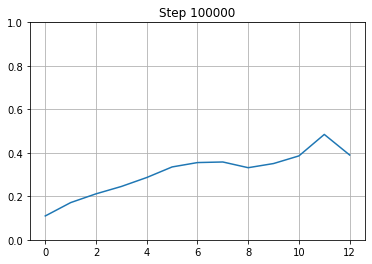

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-200000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:29<00:00,  6.85s/it]


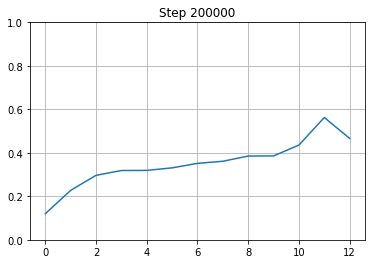

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-300000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:32<00:00,  7.15s/it]


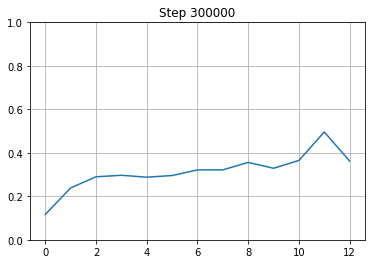

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-400000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:31<00:00,  7.06s/it]


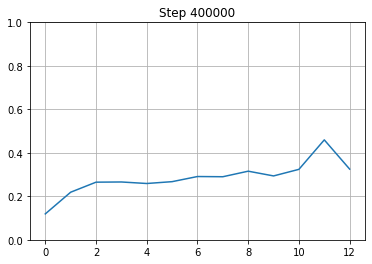

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-500000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:32<00:00,  7.08s/it]


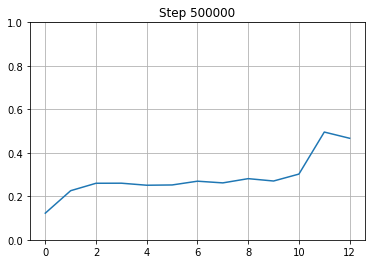

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-600000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:32<00:00,  7.15s/it]


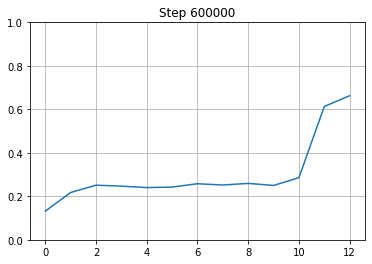

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-700000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:31<00:00,  7.08s/it]


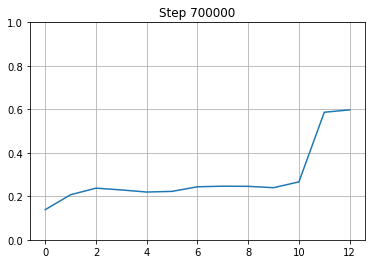

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-800000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:28<00:00,  6.83s/it]


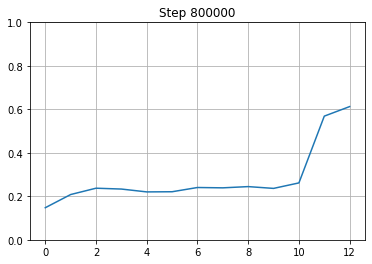

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-900000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:29<00:00,  6.86s/it]


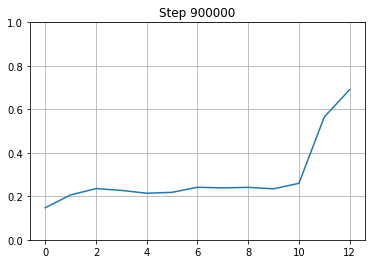

Some weights of the model checkpoint at /content/drive/MyDrive/yearly-bias/models/checkpoint-1000000 were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 13/13 [01:29<00:00,  6.91s/it]


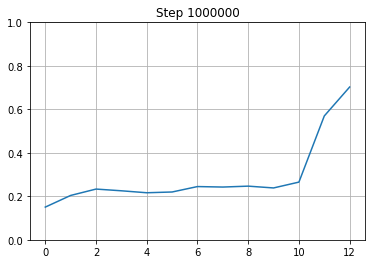

In [9]:
# test only a few checkpoints

numbers = [100000, 200000, 300000, 400000, 500000,
           600000, 700000, 800000, 900000, 1000000]

# total number of available layers
nol = 13

all_self_sims = []

# for reproducible sample
torch.manual_seed(42)

for number in numbers:
    # do not use the masked version of AutoModel
    model = AutoModel.from_pretrained(f"/content/drive/MyDrive/yearly-bias/models/checkpoint-{number}").to(device)
    tokenizer = RobertaTokenizerFast.from_pretrained(f"/content/drive/MyDrive/yearly-bias/models/checkpoint-{number}")

    # save embeddings of all sentences
    all_embeddings = [[] for _ in range(nol)]

    # the chunk size for the encoding model
    chunk_size = 100

    # use only part of the sentences as a very rough estimate
    # results do not seem to qualitatively differ
    for i in tqdm(range(0, len(sorted_sents), chunk_size)):
        chunk = sorted_sents[i: i + chunk_size]
        encoded_input = tokenizer(chunk, padding=True, return_tensors='pt').to(device)
        lens = torch.sum(encoded_input.attention_mask, dim = 1)
        with torch.no_grad():
            model_output = model(**encoded_input, output_hidden_states=True)

        # sample one word from one sentence
        s = encoded_input.attention_mask.sum(axis=1).shape
        idx = (torch.rand(s).to(device) * encoded_input.attention_mask.sum(axis=1)).long()

        for j in range(13):
            # sentence id and word id
            for si, wi in enumerate(idx):
                all_embeddings[j].append(model_output.hidden_states[j][si, wi])

    # the coefficient
    n = len(all_embeddings[0])
    coef = (n**2 - n) / 2

    self_sims = []
    for j in trange(13):
        # get pairwise cosine similarity
        # matrix too large, have to put on cpu
        embs = torch.stack(all_embeddings[j]).to("cpu")
        lembs = torch.linalg.norm(embs, dim = 1)
        pcos = (embs @ embs.T) / (lembs * lembs[:,None])

        # coef terms in total
        self_sim = torch.sum(torch.triu(pcos, diagonal=1))

        self_sims.append(self_sim.item() / coef)

    plt.plot(self_sims)
    plt.ylim(0, 1)
    plt.title(f"Step {number}")
    plt.grid()
    plt.show()

    # saving the data
    all_self_sims.append(self_sims)

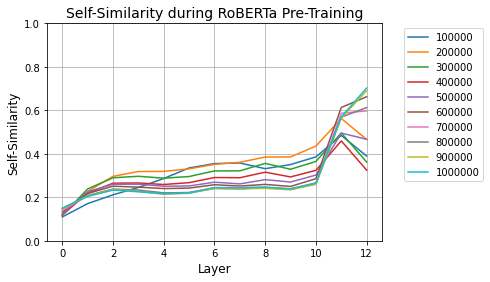

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

for number, result in zip(numbers, all_self_sims):
    plt.plot(result, label=f"{number}")

ax.set_xlabel("Layer", fontsize=12)
ax.set_ylabel("Self-Similarity", fontsize=12)
ax.set_title("Self-Similarity during RoBERTa Pre-Training", fontsize=14)
ax.set_ylim(0,1)
ax.legend(loc='upper left', bbox_to_anchor = (1.05, 1.0))
ax.grid()
plt.show()

In [11]:
with open(save_file, "wb") as f:
    pickle.dump(all_self_sims, f)